Problem Statement
Goal:
The goal of the problem is to predict whether a passenger was satisfied or not considering his/her overall experience of traveling on the Shinkansen Bullet Train.

Dataset: 

The problem consists of 1 dataset: Survey data. The survey data is aggregated data of surveys indicating the post-service experience. You are expected to treat the dataset as raw data and perform any necessary data cleaning/validation steps as required.

The data has been split into two groups and provided in the Dataset folder. The folder contains both train and test data separately.

    Train_Data
    Test_Data


Target Variable: Overall_Experience (1 represents ‘satisfied’, and 0 represents ‘not satisfied’)

The training set can be used to build your machine learning model. The training set has labels for the target column - Overall_Experience.

The testing set should be used to see how well your model performs on unseen data. For the test set, it is expected to predict the ‘Overall_Experience’ level for each participant.

Data Dictionary:

All the data is self-explanatory. The survey levels are explained in the Data Dictionary file.

Submission File Format: You will need to submit a CSV file with exactly 35,602 entries plus a header row. The file should have exactly two columns

    ID
    Overall_Experience (contains 0 & 1 values, 1 represents ‘Satisfied’, and 0 represents ‘Not Satisfied’)

Evaluation Criteria:

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.
 
In other words, the best possible accuracy is 100% (or 1) and the worst possible accuracy 0%

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import lightgbm as lgb
from sklearn.model_selection import train_test_split

import scipy as sc
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras 
import tensorflow


from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

from sklearn.multioutput import MultiOutputClassifier

from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report


from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

import time


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
features_df = pd.read_csv("/content/drive/MyDrive/ML Learning csv/Surveydata_train.csv")

In [ ]:
test_df = pd.read_csv("/content/drive/MyDrive/ML Learning csv/Surveydata_test.csv")

###Inspecting the data

In [ ]:
features_df

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good


###Handling the missing values

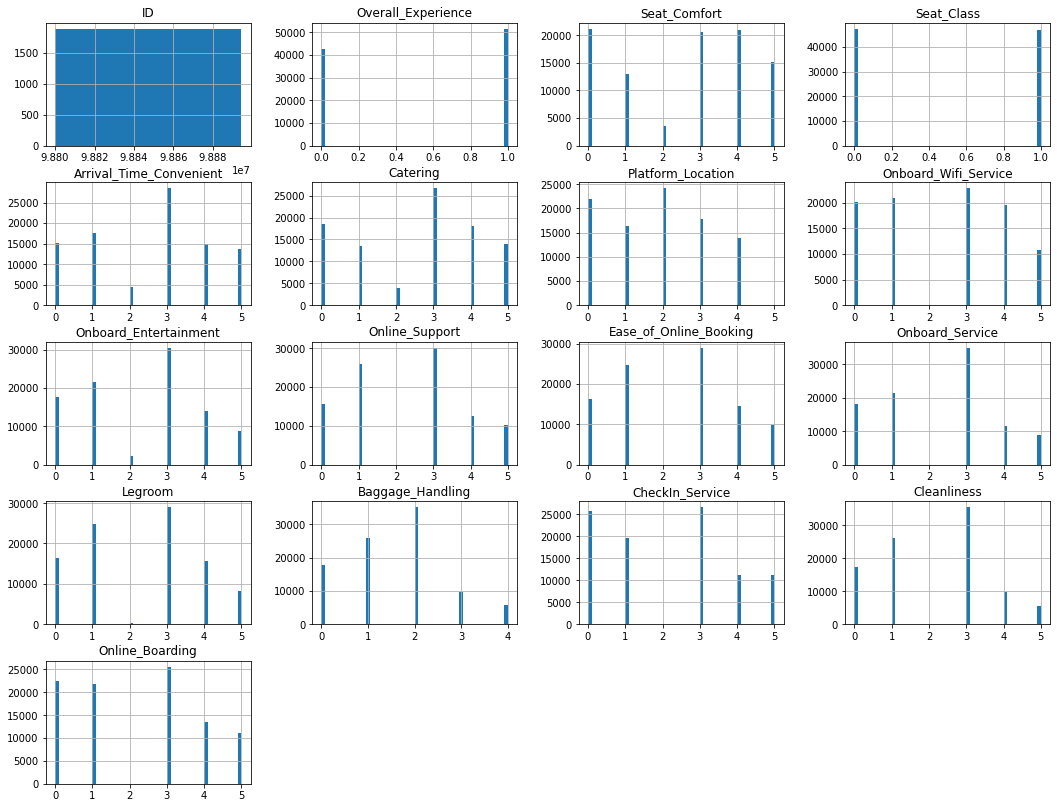

In [ ]:
#plot a histogram for each numerical attribute
%matplotlib inline  
import matplotlib.pyplot as plt
features_df.hist(bins=50, figsize=(18,14))
plt.show()

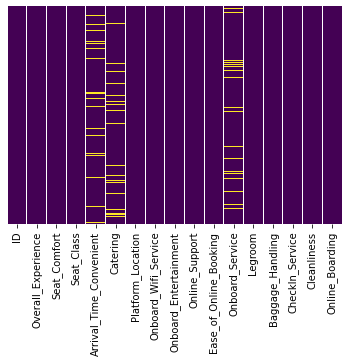

In [ ]:
sns.heatmap(features_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [ ]:
#Propotion of missing values
null_count = features_df.isnull().sum()
null_percentage = round((features_df.isnull().sum()/features_df.shape[0])*100, 2)
null_df = pd.DataFrame({'column_name' : features_df.columns,'null_count' : null_count,'null_percentage': null_percentage})
null_df.reset_index(drop = True, inplace = True)
null_df.sort_values(by = 'null_percentage', ascending = False)

,column_name,null_count,null_percentage
4,Arrival_Time_Convenient,8930,9.46
5,Catering,8741,9.26
11,Onboard_Service,7601,8.05
13,Baggage_Handling,142,0.15
9,Online_Support,91,0.10
12,Legroom,90,0.10
14,CheckIn_Service,77,0.08
10,Ease_of_Online_Booking,73,0.08
2,Seat_Comfort,61,0.06
6,Platform_Location,30,0.03


In [ ]:
features_df.head()

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good


In [ ]:
features_df.dtypes != "object"

ID                          True
Overall_Experience          True
Seat_Comfort               False
Seat_Class                 False
Arrival_Time_Convenient    False
Catering                   False
Platform_Location          False
Onboard_Wifi_Service       False
Onboard_Entertainment      False
Online_Support             False
Ease_of_Online_Booking     False
Onboard_Service            False
Legroom                    False
Baggage_Handling           False
CheckIn_Service            False
Cleanliness                False
Online_Boarding            False
dtype: bool

###Fill in missing data with nan and then impute the data

In [ ]:
# Replace Blank values with DataFrame.replace() methods.
features_df = features_df.replace(r'^\s*$', np.nan, regex=True)
features_df

,ID,Overall_Experience,Seat_Comfort,Seat_Class,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Cleanliness,Online_Boarding
0,98800001,0,Needs Improvement,Green Car,Excellent,Excellent,Very Convenient,Good,Needs Improvement,Acceptable,Needs Improvement,Needs Improvement,Acceptable,Needs Improvement,Good,Needs Improvement,Poor
1,98800002,0,Poor,Ordinary,Excellent,Poor,Needs Improvement,Good,Poor,Good,Good,Excellent,Needs Improvement,Poor,Needs Improvement,Good,Good
2,98800003,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Excellent,Excellent,Excellent,Excellent,Good,Excellent,Excellent
3,98800004,0,Acceptable,Ordinary,Needs Improvement,NaN,Needs Improvement,Acceptable,Needs Improvement,Acceptable,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Acceptable
4,98800005,1,Acceptable,Ordinary,Acceptable,Acceptable,Manageable,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Good,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,98894375,0,Poor,Ordinary,Good,Good,Convenient,Poor,Poor,Poor,Poor,Good,Good,Good,Needs Improvement,Good,Poor
94375,98894376,1,Good,Ordinary,Good,Good,Convenient,Needs Improvement,Excellent,Excellent,Acceptable,Acceptable,Acceptable,Acceptable,Good,Acceptable,Good
94376,98894377,1,Needs Improvement,Green Car,Needs Improvement,Needs Improvement,Needs Improvement,Good,Excellent,Good,Good,Good,Good,Good,Acceptable,Good,Acceptable
94377,98894378,0,Needs Improvement,Ordinary,NaN,Needs Improvement,Convenient,Good,Needs Improvement,Good,Good,Acceptable,Good,Good,Good,Excellent,Good


Fill in Nas with the mode(most frequent category per feature)

Performed on both training and testing data

In [ ]:
features_df["Seat_Comfort"].fillna("Acceptable", inplace = True)
test_df["Seat_Comfort"].fillna("Acceptable", inplace = True)

In [ ]:
features_df["Arrival_Time_Convenient"].fillna("Good", inplace = True)
test_df["Arrival_Time_Convenient"].fillna("Good", inplace = True)

In [ ]:
features_df["Catering"].fillna("Good", inplace = True)
test_df["Catering"].fillna("Good", inplace = True)

In [ ]:
features_df["Platform_Location"].fillna("Manageable", inplace = True)
test_df["Platform_Location"].fillna("Manageable", inplace = True)

In [ ]:
features_df["Onboard_Wifi_Service"].fillna("Good", inplace = True)
test_df["Onboard_Wifi_Service"].fillna("Good", inplace = True)

In [ ]:
features_df["Onboard_Entertainment"].fillna("Good", inplace = True)
test_df["Onboard_Entertainment"].fillna("Good", inplace = True)

In [ ]:
features_df["Online_Support"].fillna("Good", inplace = True)
test_df["Online_Support"].fillna("Good", inplace = True)

In [ ]:
features_df["Onboard_Service"].fillna("Good", inplace = True)
test_df["Onboard_Service"].fillna("Good", inplace = True)

In [ ]:
features_df["Legroom"].fillna("Good", inplace = True)
test_df["Legroom"].fillna("Good", inplace = True)

In [ ]:
features_df["Baggage_Handling"].fillna("Good", inplace = True)
test_df["Baggage_Handling"].fillna("Good", inplace = True)

In [ ]:
features_df["Ease_of_Online_Booking"].fillna("Good", inplace = True)
test_df["Ease_of_Online_Booking"].fillna("Good", inplace = True)

In [ ]:
features_df["CheckIn_Service"].fillna("Good", inplace = True)
test_df["CheckIn_Service"].fillna("Good", inplace = True)

In [ ]:
features_df["Cleanliness"].fillna("Good", inplace = True)
test_df["Cleanliness"].fillna("Good", inplace = True)

In [ ]:
features_df["Online_Boarding"].fillna("Good", inplace = True)
test_df["Online_Boarding"].fillna("Good", inplace = True)

In [ ]:
features_df.isna().sum()

ID                         0
Overall_Experience         0
Seat_Comfort               0
Seat_Class                 0
Arrival_Time_Convenient    0
Catering                   0
Platform_Location          0
Onboard_Wifi_Service       0
Onboard_Entertainment      0
Online_Support             0
Ease_of_Online_Booking     0
Onboard_Service            0
Legroom                    0
Baggage_Handling           0
CheckIn_Service            0
Cleanliness                0
Online_Boarding            0
dtype: int64

###Preprocessing the data

The missing values are now successfully handled.

There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model.

LabelEncoder can be used to normalize labels. It can also be used to transform non-numerical labels (as long as they are hashable and comparable) to numerical labels

In [ ]:
 le = LabelEncoder()

In [ ]:
features_df.Seat_Comfort = le.fit_transform(features_df.Seat_Comfort)
features_df.Arrival_Time_Convenient = le.fit_transform(features_df.Arrival_Time_Convenient)
features_df.Catering  = le.fit_transform(features_df.Catering )
features_df.Platform_Location = le.fit_transform(features_df.Platform_Location)
features_df.Onboard_Wifi_Service = le.fit_transform(features_df.Onboard_Wifi_Service)
features_df.Onboard_Entertainment = le.fit_transform(features_df.Onboard_Entertainment)
features_df.Online_Support = le.fit_transform(features_df.Online_Support)
features_df.Ease_of_Online_Bookingn = le.fit_transform(features_df.Ease_of_Online_Booking)
features_df.Onboard_Service = le.fit_transform(features_df.Onboard_Service)
features_df.Legroom = le.fit_transform(features_df.Legroom)
features_df.Baggage_Handling = le.fit_transform(features_df.Baggage_Handling)
features_df.CheckIn_Service  = le.fit_transform(features_df.CheckIn_Service )
features_df.Cleanliness = le.fit_transform(features_df.Cleanliness)
features_df.Online_Boarding = le.fit_transform(features_df.Online_Boarding)
features_df.Seat_Class = le.fit_transform(features_df.Seat_Class)
features_df.Ease_of_Online_Booking = le.fit_transform(features_df.Ease_of_Online_Booking)

<ipython-input-306-8c26c1867805>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  features_df.Ease_of_Online_Bookingn = le.fit_transform(features_df.Ease_of_Online_Booking)


In [ ]:
test_df.Seat_Comfort = le.fit_transform(test_df.Seat_Comfort)
test_df.Arrival_Time_Convenient = le.fit_transform(test_df.Arrival_Time_Convenient)
test_df.Catering = le.fit_transform(test_df.Catering)
test_df.Platform_Location = le.fit_transform(test_df.Platform_Location)
test_df.Onboard_Wifi_Service = le.fit_transform(test_df.Onboard_Wifi_Service)
test_df.Onboard_Entertainment = le.fit_transform(test_df.Onboard_Entertainment)
test_df.Online_Support = le.fit_transform(test_df.Online_Support)
test_df.Ease_of_Online_Bookingn = le.fit_transform(test_df.Ease_of_Online_Booking)
test_df.Onboard_Service = le.fit_transform(test_df.Onboard_Service)
test_df.Legroom = le.fit_transform(test_df.Legroom)
test_df.Baggage_Handling = le.fit_transform(test_df.Baggage_Handling)
test_df.CheckIn_Service = le.fit_transform(test_df.CheckIn_Service)
test_df.Cleanliness = le.fit_transform(test_df.Cleanliness)
test_df.Online_Boarding = le.fit_transform(test_df.Online_Boarding)
test_df.Seat_Class = le.fit_transform(test_df.Seat_Class)
test_df.Ease_of_Online_Booking = le.fit_transform(test_df.Ease_of_Online_Booking)

<ipython-input-307-7e33162ac0ac>:8: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  test_df.Ease_of_Online_Bookingn = le.fit_transform(test_df.Ease_of_Online_Booking)


###Correlation Plot

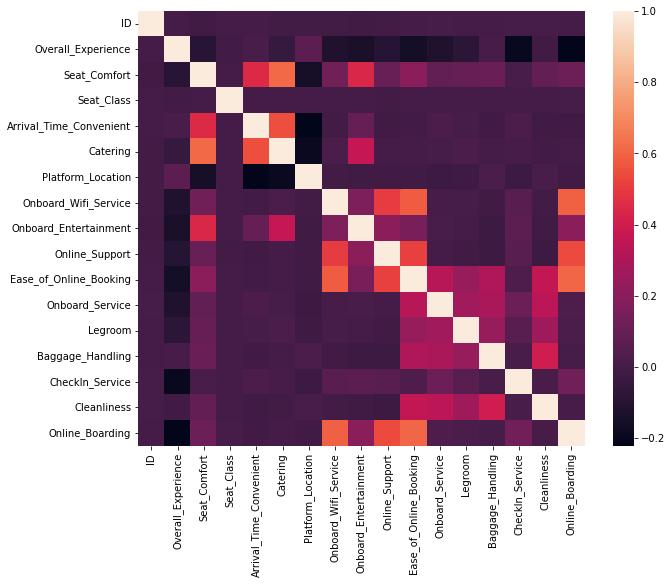

In [ ]:
plt.figure(figsize = (10, 8))
sns.heatmap(features_df.corr())

###Selecting best features

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2, f_regression

Scikit-learn API provides SelectKBest class for extracting best features of given dataset. The SelectKBest method selects the features according to the k highest score.

In [ ]:
# Create the object for SelectKBest and fit and transform the classification data
# k is the number of features you want to select
bestfeatures = SelectKBest(score_func=chi2, k=13)

In [ ]:
# Create feature and target variable for Classification problem
#SelectKBest selects the best 24 variables and drops the worst with least predictive power
x=features_df.iloc[:,0:17]
x= features_df.drop('Overall_Experience', axis=1)

In [ ]:
y = features_df['Overall_Experience']

In [ ]:
fit=bestfeatures.fit(x,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)

In [ ]:
#Concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)

In [ ]:
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(13,'Score')) 

                      Specs        Score
15          Online_Boarding  6383.829823
13          CheckIn_Service  5358.933834
9    Ease_of_Online_Booking  2692.779029
7     Onboard_Entertainment  2065.783817
6      Onboard_Wifi_Service  1763.842817
10          Onboard_Service  1501.225702
8            Online_Support  1042.678640
1              Seat_Comfort  1010.044072
11                  Legroom   733.139739
5         Platform_Location   504.666298
4                  Catering   232.270121
3   Arrival_Time_Convenient    24.429326
12         Baggage_Handling    10.275796


In [ ]:
#Worst features
#ID                         
#Seat_Class                 
#Cleanliness                

Based on the results, I will drop ID, seat class and cleanliness in the training and testing sets because they don't help with our predictions

In [ ]:
#Specify the dependent variable and independent variable
y = features_df['Overall_Experience']
x=features_df.drop(['ID','Seat_Class','Cleanliness','Overall_Experience'],axis=1)
x

,Seat_Comfort,Arrival_Time_Convenient,Catering,Platform_Location,Onboard_Wifi_Service,Onboard_Entertainment,Online_Support,Ease_of_Online_Booking,Onboard_Service,Legroom,Baggage_Handling,CheckIn_Service,Online_Boarding
0,4,1,1,4,3,4,0,4,4,0,3,3,5
1,5,1,5,3,3,5,3,3,1,4,4,4,3
2,4,4,4,3,4,3,1,1,1,1,1,3,1
3,0,4,3,3,0,4,0,0,0,0,0,3,0
4,0,0,0,2,4,3,1,3,3,3,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
94374,5,3,3,0,5,5,5,5,3,3,2,4,5
94375,3,3,3,0,4,1,1,0,0,0,0,3,3
94376,4,4,4,3,3,1,3,3,3,3,2,0,0
94377,4,3,4,0,3,4,3,3,0,3,2,3,3


In [ ]:
test_df=test_df.drop(['ID','Seat_Class','Cleanliness'],axis=1)

In [ ]:
categorical_cols = features_df.columns[features_df.dtypes == "object"].values
print(categorical_cols)

[]


In [ ]:
numeric_cols = features_df.columns[features_df.dtypes != "object"].values
print(numeric_cols)

['ID' 'Overall_Experience' 'Seat_Comfort' 'Seat_Class'
 'Arrival_Time_Convenient' 'Catering' 'Platform_Location'
 'Onboard_Wifi_Service' 'Onboard_Entertainment' 'Online_Support'
 'Ease_of_Online_Booking' 'Onboard_Service' 'Legroom' 'Baggage_Handling'
 'CheckIn_Service' 'Cleanliness' 'Online_Boarding']


###Scaling the data
Feature Scaling is a technique to standardize the independent features present in the data in a fixed range

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(features_df))
StandardScaler()

StandardScaler()


StandardScaler()

In [ ]:
print(scaler.mean_)
print(scaler.transform(features_df))

[9.88471900e+07 5.46657625e-01 2.55767703e+00 4.97398786e-01
 2.54590534e+00 2.57056125e+00 1.84665021e+00 2.35045932e+00
 2.29111349e+00 2.30013033e+00 2.31490056e+00 2.28141854e+00
 2.28815732e+00 1.57352801e+00 2.11844796e+00 2.11647718e+00
 2.20374236e+00]
[[-1.73203246 -1.09810672  0.79642094 ...  0.50014292  1.23388213
   1.60210316]
 [-1.73199575 -1.09810672  1.34860027 ...  1.06748654  0.57878939
   0.45621221]
 [-1.73195905  0.9106583   0.79642094 ...  0.50014292 -0.7313961
  -0.68967874]
 ...
 [ 1.73195905  0.9106583   0.79642094 ... -1.20188792  0.57878939
  -1.26262421]
 [ 1.73199575 -1.09810672  0.79642094 ...  0.50014292 -0.7313961
   0.45621221]
 [ 1.73203246 -1.09810672 -1.4122964  ...  1.63483015  0.57878939
  -1.26262421]]


In [ ]:
scaler = StandardScaler()
print(scaler.fit(test_df))
StandardScaler()

StandardScaler()


StandardScaler()

In [ ]:
print(scaler.mean_)
print(scaler.transform(test_df))

[2.55701927 2.5384529  2.55342396 1.84930622 2.35790124 2.27945059
 1.74214932 2.32512218 1.71147688 2.28739958 1.57766418 1.60252233
 2.21591484]
[[-1.41151397 -1.52038819 -1.47899899 ... -0.52827741  0.30154907
   1.59848777]
 [-0.3074832   0.27644033  1.41711033 ...  0.38622869 -1.21576417
  -1.2722717 ]
 [-0.85949859 -0.92144535 -0.89977712 ...  1.30073478  0.30154907
  -0.69811981]
 ...
 [ 0.24453218 -0.32250251  0.2586666  ...  2.21524088  1.8188623
   1.02433588]
 [-0.85949859 -0.92144535 -0.89977712 ... -0.52827741 -1.21576417
   0.45018398]
 [ 0.24453218 -1.52038819  0.2586666  ...  0.38622869  1.06020568
   1.59848777]]


###  Fitting an XG Boost model to the train set Model of the Surveydata

In [ ]:
from xgboost import XGBClassifier

In [ ]:
clf = XGBClassifier(learning_rate=0.02, n_estimators=200, objective='binary:logistic',silent=True)

In [ ]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=0)

In [ ]:
clf.fit(X_train, y_train)

XGBClassifier(learning_rate=0.02, n_estimators=200, silent=True)

In [ ]:
#Randomsearchparams = # specify your configurations as a dict
features_df[categorical_cols] = features_df[categorical_cols].astype('category')

parameters ={
              'booster':['gbtree','gblinear'],
              'learning_rate': [0.0001, 0.001, 0.01, 0.15, 0.25, 0.3], 
              'max_depth': [3,5,6,7],
              'min_child_weight': [12,15,17,19],
              'colsample_bytree': [0.8,0.9,1],
              "reg_alpha"   : [0.5,0.4,1],
              "reg_lambda"  : [2,3,5],
              "gamma"       : [4,5,6]
             
         } 
fit_params= {
    'feature_name': "auto",
    'categorical_feature': categorical_cols,
}           

In [ ]:
search = RandomizedSearchCV(clf,parameters, cv = 5, n_iter=80,verbose=1)

In [ ]:
# Train on training data-
search.fit(X_train, y_train,verbose=1)

Fitting 5 folds for each of 80 candidates, totalling 400 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(learning_rate=0.02, n_estimators=200,
                                           silent=True),
                   n_iter=80,
                   param_distributions={'booster': ['gbtree', 'gblinear'],
                                        'colsample_bytree': [0.8, 0.9, 1],
                                        'gamma': [4, 5, 6],
                                        'learning_rate': [0.0001, 0.001, 0.01,
                                                          0.15, 0.25, 0.3],
                                        'max_depth': [3, 5, 6, 7],
                                        'min_child_weight': [12, 15, 17, 19],
                                        'reg_alpha': [0.5, 0.4, 1],
                                        'reg_lambda': [2, 3, 5]},
                   verbose=1)

In [ ]:
y_pred = search.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12919
           1       0.95      0.93      0.94     15395

    accuracy                           0.93     28314
   macro avg       0.93      0.93      0.93     28314
weighted avg       0.93      0.93      0.93     28314



In [ ]:
search.best_params_

{'reg_lambda': 5,
 'reg_alpha': 0.5,
 'min_child_weight': 19,
 'max_depth': 7,
 'learning_rate': 0.3,
 'gamma': 4,
 'colsample_bytree': 0.9,
 'booster': 'gbtree'}

In [ ]:
# Train data prediction
y_hat = search.predict(X_train)

In [ ]:
preds = search.predict_proba(X_test)
preds

array([[5.1482618e-02, 9.4851738e-01],
       [8.6164474e-03, 9.9138355e-01],
       [1.0635257e-03, 9.9893647e-01],
       ...,
       [5.1945448e-04, 9.9948055e-01],
       [7.9527444e-01, 2.0472555e-01],
       [8.6882591e-02, 9.1311741e-01]], dtype=float32)

In [ ]:
# Train data confusion matrix
pd.crosstab(y_train, y_hat)

col_0,0,1
Overall_Experience,,
0,28324,1543
1,2208,33990


In [ ]:
# Validation data confusion matrix
y_hat_val = search.predict(X_test)
pd.crosstab(y_test, y_hat_val)

col_0,0,1
Overall_Experience,,
0,12091,828
1,1076,14319


In [ ]:
# Predicting probs for final data
y_hat_test = search.predict_proba(test_df)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
roc_auc_score(y_test, y_hat_val)

0.933007764847357

Evaluation Criteria:

Accuracy Score: The evaluation metric is simply the percentage of predictions made by the model that turned out to be correct. This is also called the accuracy of the model. It will be calculated as the total number of correct predictions (True Positives + True Negatives) divided by the total number of observations in the dataset.


In [ ]:
#(12091+14319)/(12091+828+1076+14319)

In [ ]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_hat_val))

0.9327541145722964


# Submisison data

In [ ]:
# importing submision data
submission_df = pd.read_csv("/content/drive/MyDrive/ML Learning csv/Sample_Submission.csv",index_col="ID")

In [ ]:
submission_df.to_csv('my_submission.csv', index=True)

In [ ]:
# filling with our predictied probabilities
submission_df['Overall_Experience'] = y_hat_test[:, 1]

In [ ]:
# Saving it
#submission_df.to_csv('my_submission_lgbm.csv', index=True)